In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Инициализация фигуры для общего графика

colors = {
    "en-ru": "blue",
    "en-fr": "teal",
    "en-hi": "black",
    "en-ar": "purple",
    "en-es": "brown",
    "en-it": "navy"
}

markers = {
    "en-ru": "v",
    "en-fr": "X",
    "en-hi": "8",
    "en-ar": "s",
    "en-es": "d",
    "en-it": "D"
}

In [2]:
XNLI = pd.read_csv('./parallel/ANC_XNLI_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
XNLI['Value'] = XNLI['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_XNLI_by_pair = XNLI.groupby('Language Pair')['Value'].apply(list)

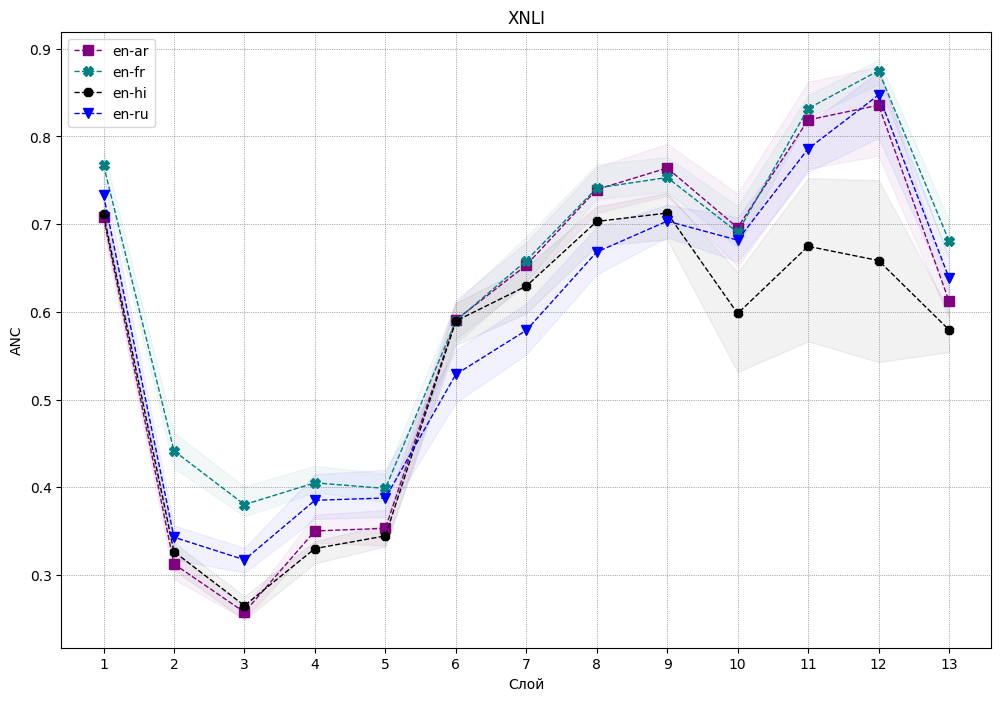

In [3]:
plt.figure(figsize=(12, 8))
for (lang_pair, values) in data_XNLI_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()


In [4]:
Readme = pd.read_csv('./parallel/ANC_Readme_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme['Value'] = Readme['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_by_pair = Readme.groupby('Language Pair')['Value'].apply(list)

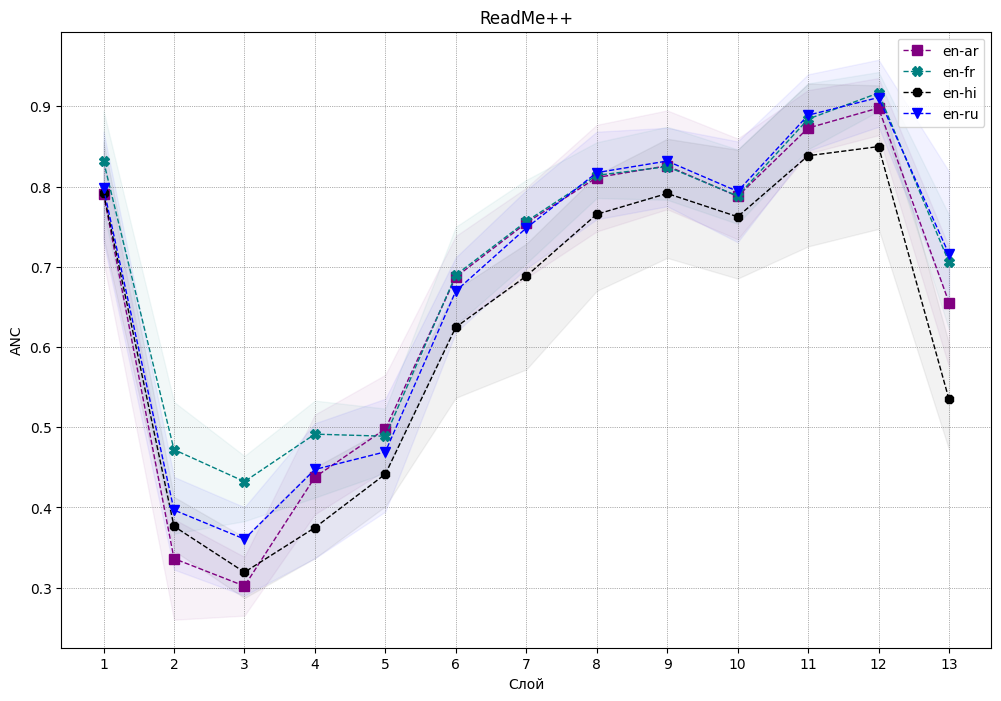

In [5]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_Readme_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('ReadMe++')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [6]:
VvsW = pd.read_csv('./parallel/ANC_VvsW_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
VvsW['Value'] = VvsW['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_VvsW_by_pair = VvsW.groupby('Language Pair')['Value'].apply(list)

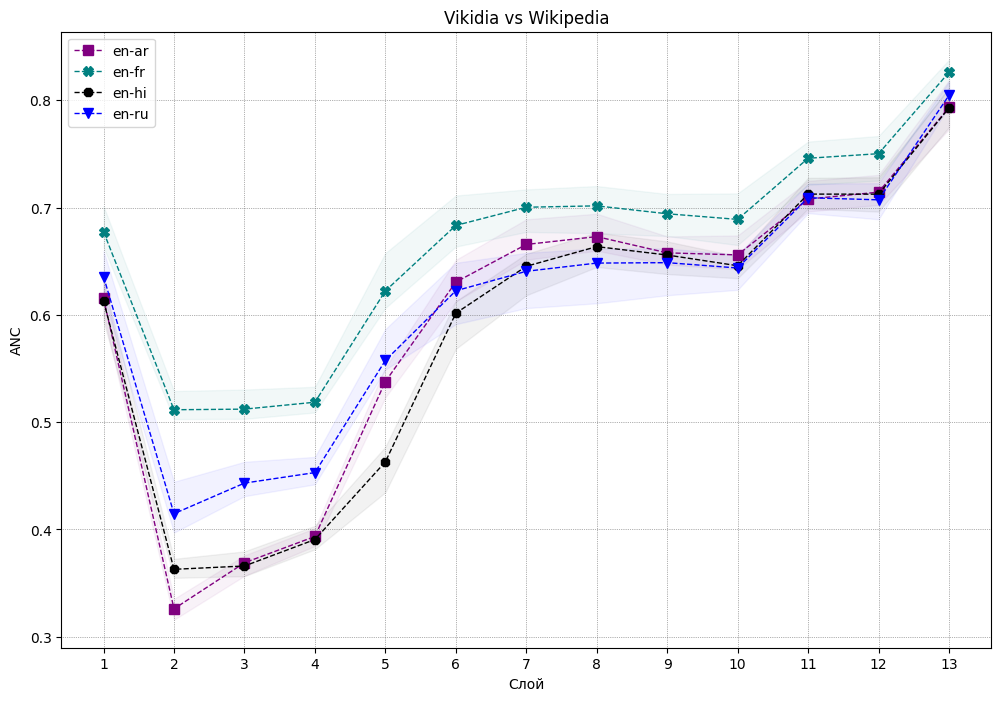

In [7]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_VvsW_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('Vikidia vs Wikipedia')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [8]:
data_dict = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}

en-ar 0.6123984612195346
en-fr 0.6808655574665948
en-hi 0.5795100511685111
en-ru 0.6386754279990425
en-ar 0.6554263312704862
en-fr 0.7054856554605066
en-hi 0.5347654079211643
en-ru 0.7157717033798108
en-ar 0.7933511788471659
en-fr 0.8260476308624007
en-hi 0.792815708331919
en-ru 0.8046057092708725


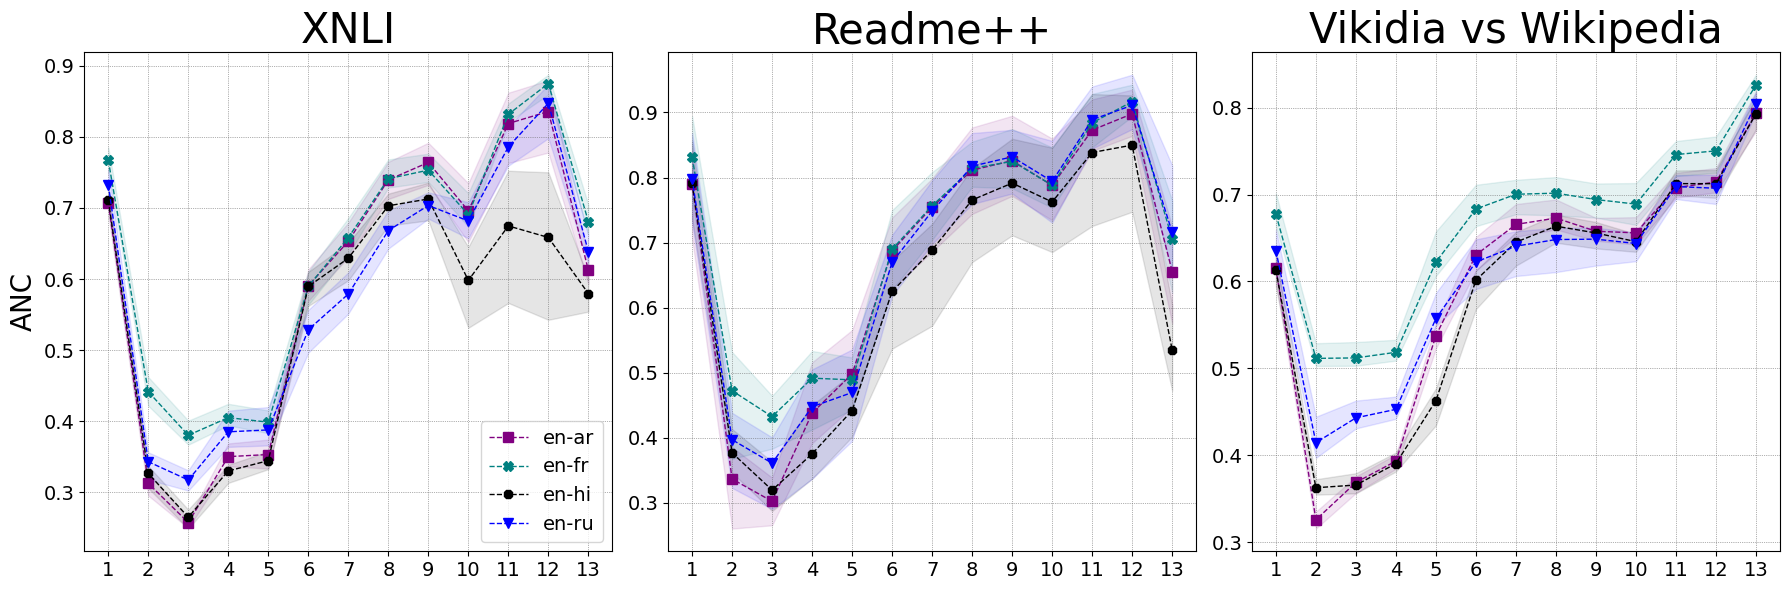

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict.items()):
    # Выбор текущей оси
    ax = axs[idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        print(lang_pair, mean_values[-1])
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    ax.set_title(data_key, size=30)
    #ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('ANC', size=20)
        ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [10]:
XNLI = pd.read_csv('./parallel/wasserstein_XNLI_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
XNLI['Value'] = XNLI['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_XNLI_by_pair = XNLI.groupby('Language Pair')['Value'].apply(list)

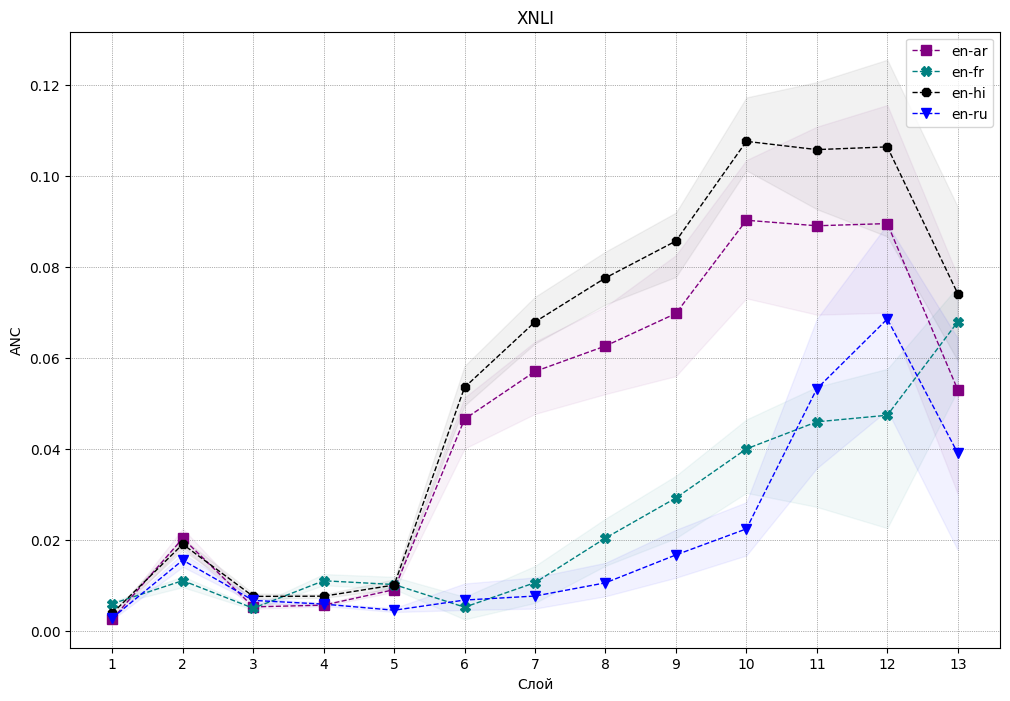

In [11]:
plt.figure(figsize=(12, 8))
for (lang_pair, values) in data_XNLI_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('XNLI')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()


In [12]:
Readme = pd.read_csv('./parallel/wasserstein_Readme_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
Readme['Value'] = Readme['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_Readme_by_pair = Readme.groupby('Language Pair')['Value'].apply(list)

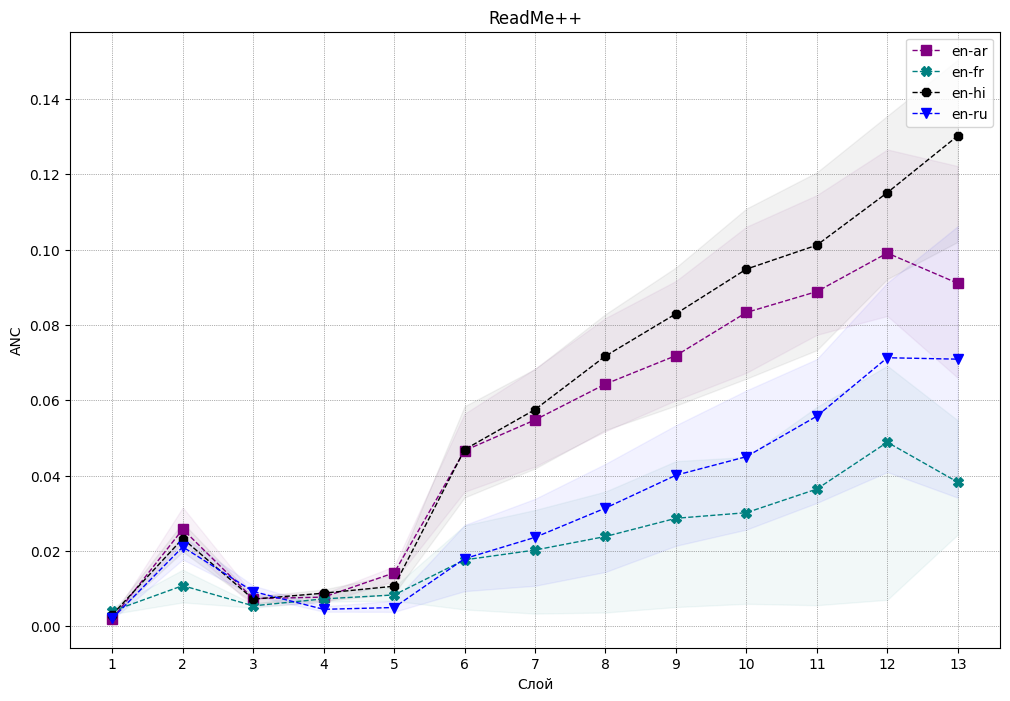

In [13]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_Readme_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('ReadMe++')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [17]:
VvsW = pd.read_csv('./parallel/wasserstein_VvsW_roberta.txt', sep=';')
# Преобразование строки со значениями в список чисел
VvsW['Value'] = VvsW['Value'].apply(ast.literal_eval)

# Подготовка данных для построения графиков
data_VvsW_by_pair = VvsW.groupby('Language Pair')['Value'].apply(list)

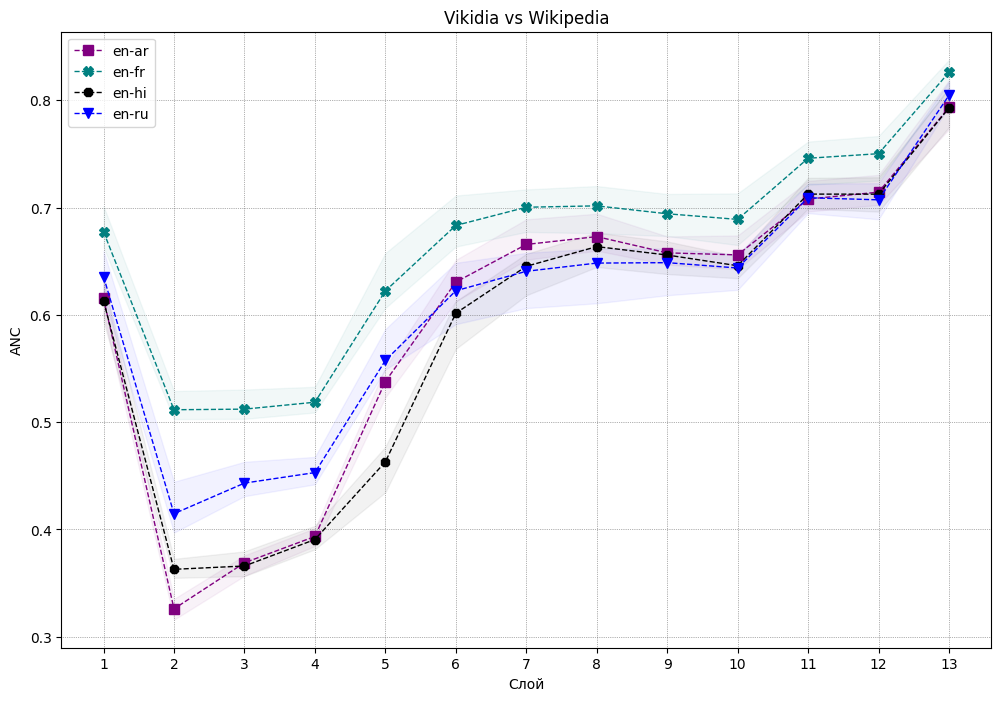

In [14]:
# Инициализация фигуры для общего графика
plt.figure(figsize=(12, 8))


for (lang_pair, values) in data_VvsW_by_pair.items():
    # Объединение всех списков значений в один массив для удобства обработки
    values_array = np.array(values)

    # Вычисление минимального, максимального и среднего значения в каждой точке
    min_values = values_array.min(axis=0)
    max_values = values_array.max(axis=0)
    mean_values = values_array.mean(axis=0)

    # Построение графика
    x = range(1, len(mean_values)+1)
    color = colors.get(lang_pair, "grey")
    marker = markers.get(lang_pair, "*")

    plt.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
    plt.fill_between(x, min_values, max_values, color=color, alpha=0.05)

plt.title('Vikidia vs Wikipedia')
plt.xlabel('Слой')
plt.ylabel('ANC')
plt.xticks(range(1, len(mean_values) + 1))
plt.legend()
plt.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)
plt.show()

In [15]:
data_dict = {'XNLI': data_XNLI_by_pair, 'Readme++': data_Readme_by_pair, 'Vikidia vs Wikipedia': data_VvsW_by_pair}

en-ar 0.052997691986074416
en-fr 0.06792395078526758
en-hi 0.07411023779924067
en-ru 0.039079159269326466
en-ar 0.09104052427190366
en-fr 0.038270573176630185
en-hi 0.13017920360951157
en-ru 0.07091276121265391
en-ar 0.7933511788471659
en-fr 0.8260476308624007
en-hi 0.792815708331919
en-ru 0.8046057092708725


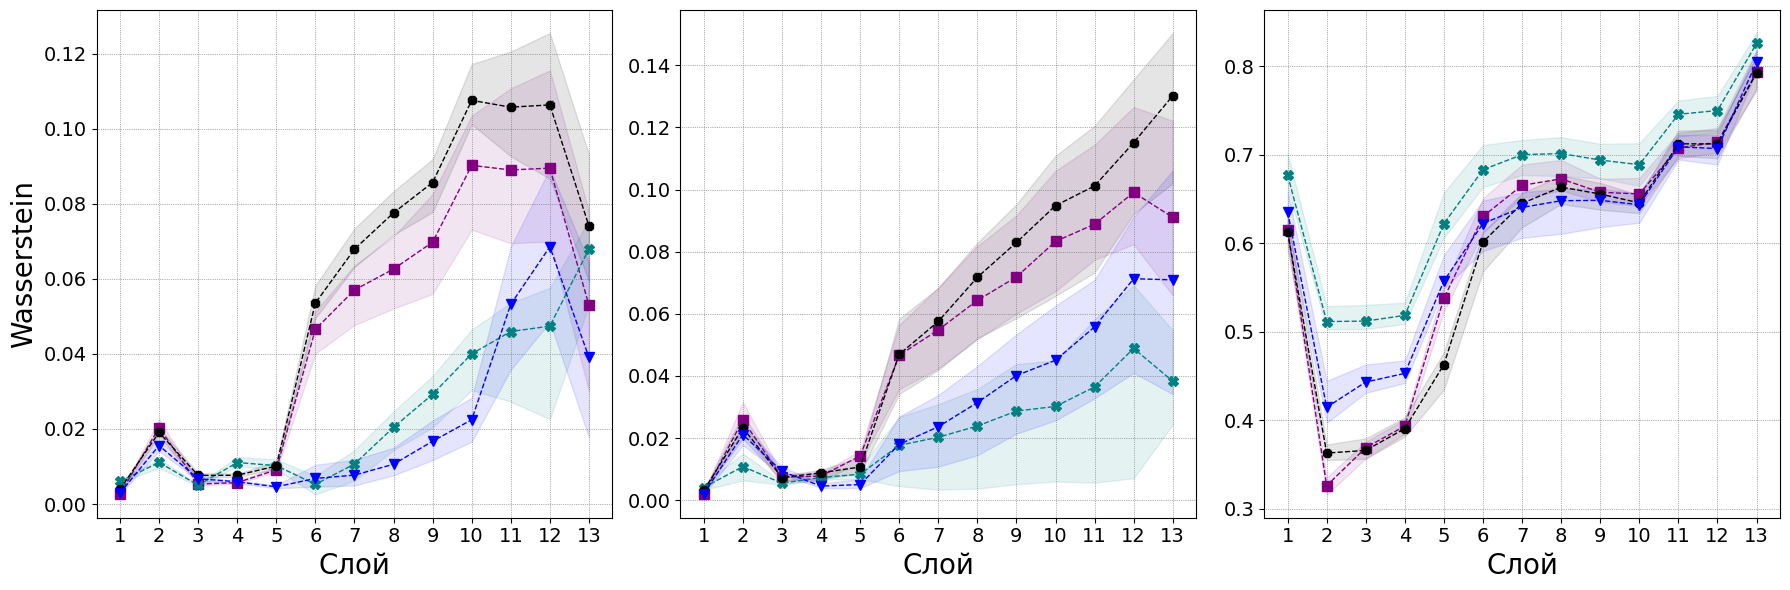

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Пример итерации по трем различным наборам данных
for idx, (data_key, data_value) in enumerate(data_dict.items()):
    # Выбор текущей оси
    ax = axs[idx]

    # Построение графика на текущей оси
    for (lang_pair, values) in data_value.items():
        values_array = np.array(values)
        min_values = values_array.min(axis=0)
        max_values = values_array.max(axis=0)
        mean_values = values_array.mean(axis=0)
        print(lang_pair, mean_values[-1])
        x = range(1, len(mean_values)+1)
        color = colors.get(lang_pair, "grey")
        marker = markers.get(lang_pair, "*")
        
        ax.plot(x, mean_values, marker=marker, markersize=7, label=f'{lang_pair}', color=color, linewidth=1, linestyle='--')
        ax.fill_between(x, min_values, max_values, color=color, alpha=0.1)

    #ax.set_title(data_key, size=30)
    ax.set_xlabel('Слой', size=20)
    if idx == 0:
        ax.set_ylabel('Wasserstein', size=20)
        #ax.legend(fontsize=14)
    ax.set_xticks(range(1, len(mean_values) + 1))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [18]:
# Считывание ANC и Wasserstein
def read_data(file_path):
    data = pd.read_csv(file_path, sep=';')
    data['Value'] = data['Value'].apply(ast.literal_eval)
    return data.groupby('Language Pair')['Value'].apply(list)

# Считывание F1 
def read_f1_data(file_path):
    data = pd.read_csv(file_path)
    data['Value'] = data['Value'].apply(ast.literal_eval)
    data.set_index('Language', inplace=True)
    return data.groupby('Language')['Value'].apply(lambda x: list(x)[0])

ANC_XNLI = read_data('parallel/ANC_XNLI_roberta.txt')
ANC_Readme = read_data('parallel/ANC_ReadMe_roberta.txt')
ANC_VvsW = read_data('parallel/ANC_VvsW_roberta.txt')

Wasserstein_XNLI = read_data('parallel/wasserstein_XNLI_roberta.txt')
Wasserstein_Readme = read_data('parallel/wasserstein_ReadMe_roberta.txt')
Wasserstein_VvsW = read_data('parallel/wasserstein_VvsW_roberta.txt')

f1_XNLI = read_f1_data('parallel/f1_XNLI_roberta.csv')
f1_Readme = read_f1_data('parallel/f1_ReadMe_roberta.csv')
f1_VvsW = read_f1_data('parallel/f1_VvsW_roberta.csv')

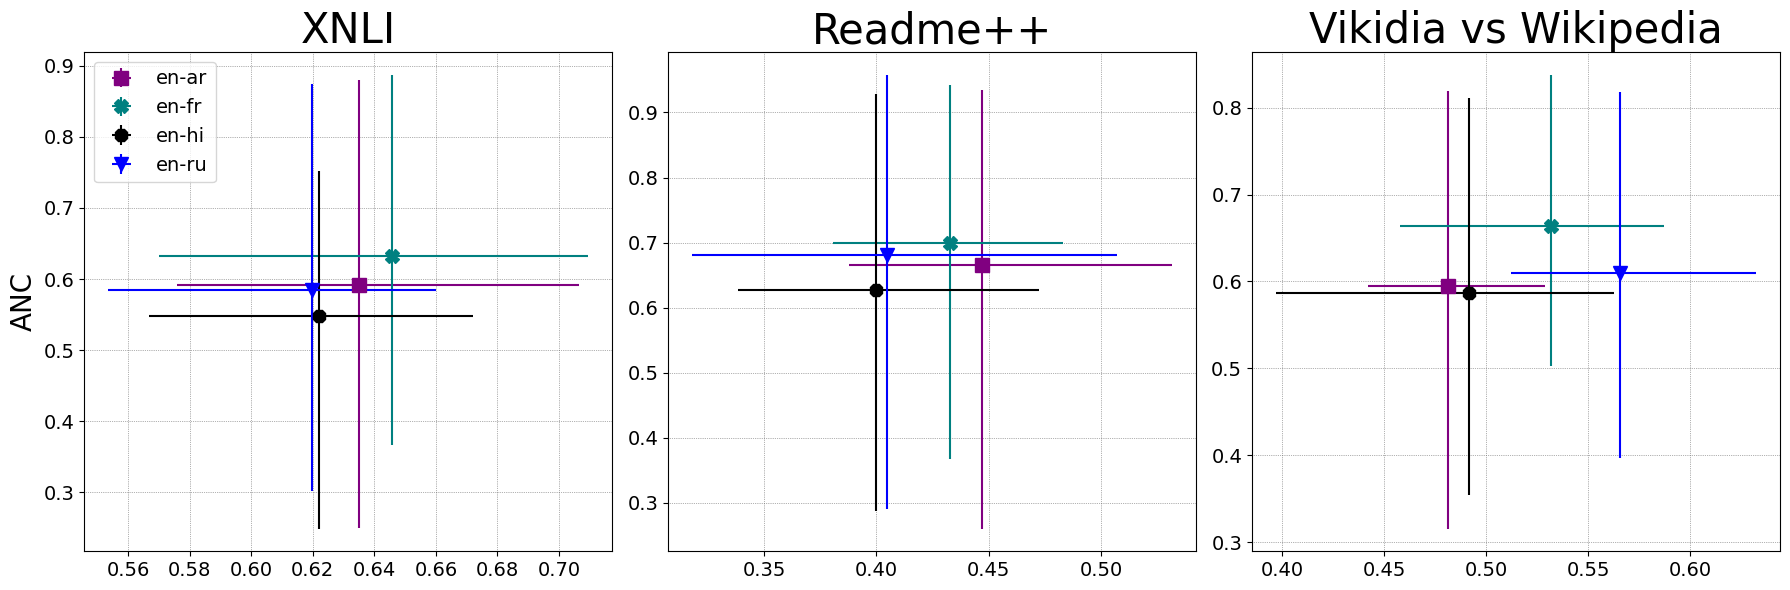

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

datasets = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

for idx, (title, f1_dict, anc_dict) in enumerate(datasets):
    ax = axs[idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            ANC_mean = anc_dict[f"en-{lang}"][-1]
            ANC_min = np.min(anc_dict[f"en-{lang}"])
            ANC_max = np.max(anc_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, ANC_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[ANC_mean - ANC_min], [ANC_max - ANC_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")
    
    ax.set_title(title, size=30)
    #ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("ANC", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


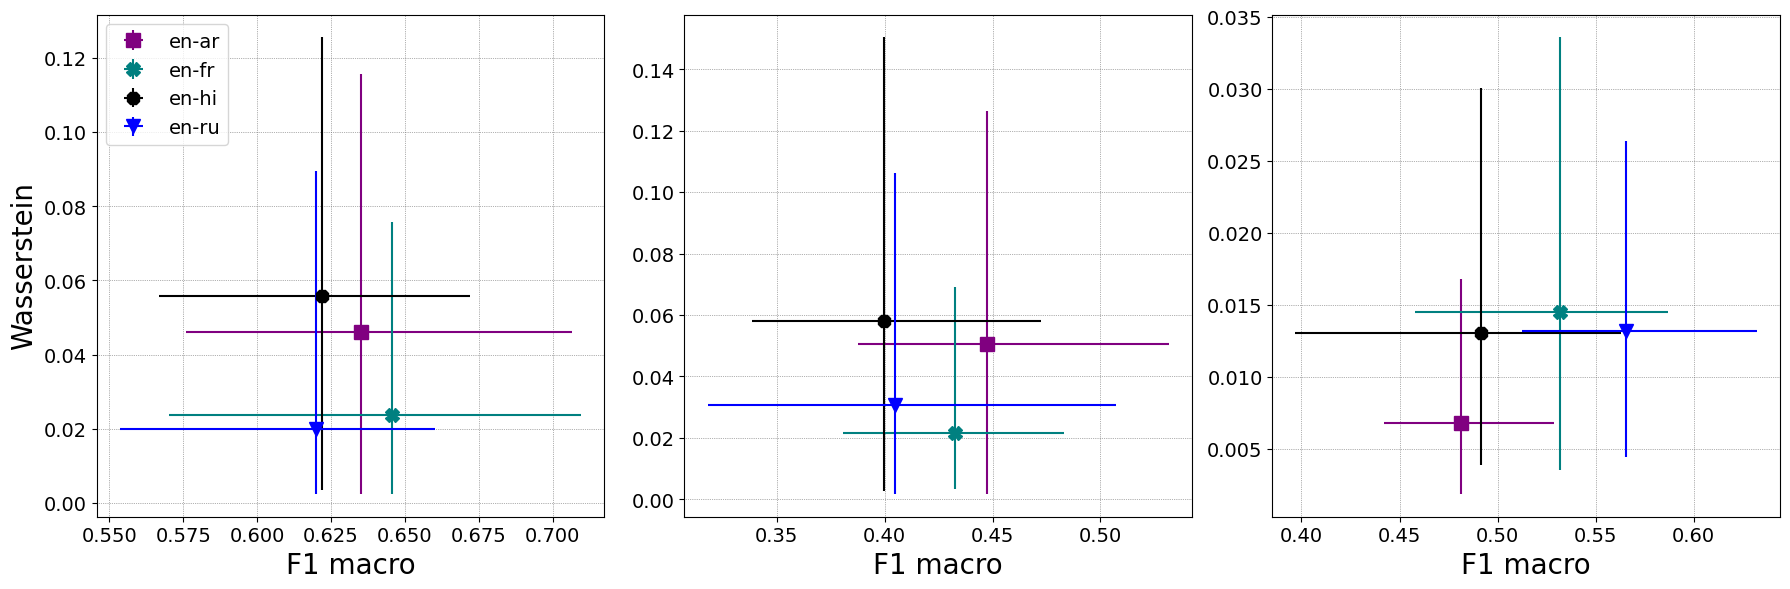

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

datasets = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, Wasserstein_dict) in enumerate(datasets):
    ax = axs[idx]
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            Wasserstein_mean = Wasserstein_dict[f"en-{lang}"][-1]
            Wasserstein_min = np.min(Wasserstein_dict[f"en-{lang}"])
            Wasserstein_max = np.max(Wasserstein_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, Wasserstein_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[Wasserstein_mean - Wasserstein_min], [Wasserstein_max - Wasserstein_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")
    
    #ax.set_title(title, size=30)
    ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


In [21]:
# Считывание ANC и Wasserstein
def read_data(file_path):
    data = pd.read_csv(file_path, sep=';')
    data['Value'] = data['Value'].apply(ast.literal_eval)
    return data.groupby('Language Pair')['Value'].apply(list)

# Считывание F1 
def read_f1_data(file_path):
    data = pd.read_csv(file_path)
    data['Value'] = data['Value'].apply(ast.literal_eval)
    data.set_index('Language', inplace=True)
    return data.groupby('Language')['Value'].apply(lambda x: list(x)[0])

ANC_XNLI = read_data('parallel/ANC_XNLI_roberta.txt')
ANC_Readme = read_data('parallel/ANC_ReadMe_roberta.txt')
ANC_VvsW = read_data('parallel/ANC_VvsW_roberta.txt')

Wasserstein_XNLI = read_data('parallel/wasserstein_XNLI_roberta.txt')
Wasserstein_Readme = read_data('parallel/wasserstein_ReadMe_roberta.txt')
Wasserstein_VvsW = read_data('parallel/wasserstein_VvsW_roberta.txt')

f1_XNLI = read_f1_data('parallel/f1_XNLI_roberta.csv')
f1_Readme = read_f1_data('parallel/f1_ReadMe_roberta.csv')
f1_VvsW = read_f1_data('parallel/f1_VvsW_roberta.csv')

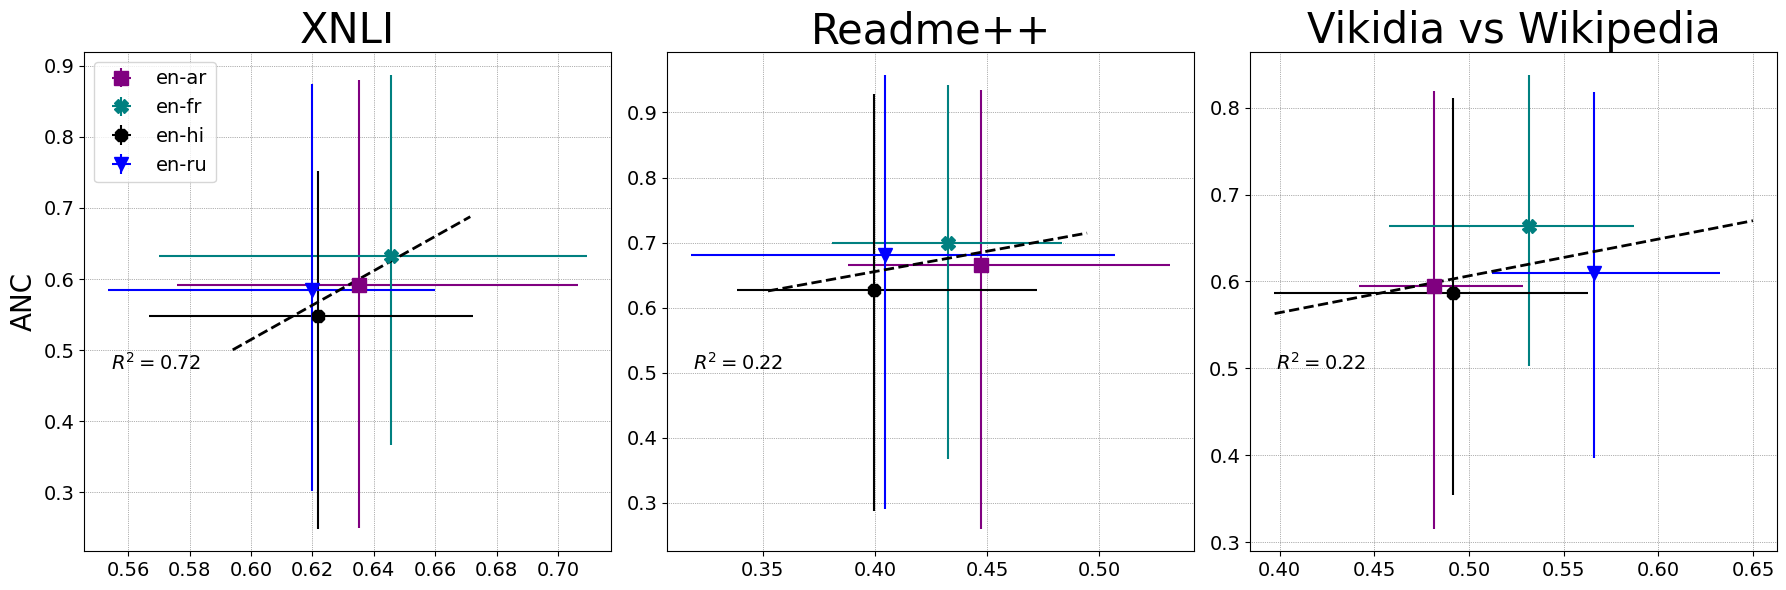

In [22]:
datasets = [("XNLI", f1_XNLI, ANC_XNLI), ("Readme++", f1_Readme, ANC_Readme), ("Vikidia vs Wikipedia", f1_VvsW, ANC_VvsW)]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for idx, (title, f1_dict, anc_dict) in enumerate(datasets):
    ax = axs[idx]
    x_vals = []
    y_vals = []
    
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            ANC_mean = anc_dict[f"en-{lang}"][-1]
            ANC_min = np.min(anc_dict[f"en-{lang}"])
            ANC_max = np.max(anc_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, ANC_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[ANC_mean - ANC_min], [ANC_max - ANC_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")

            x_vals.append(f1_mean)
            y_vals.append(ANC_mean)
    
    # Линейная аппроксимация
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

    delta_x = max(x_vals) - min(x_vals)
    x = np.linspace(min(x_vals) - delta_x, max(x_vals) + delta_x, 100)
    y = intercept + slope * x
    ax.plot(x, y, color='black', linestyle='--', linewidth=2)
    
    # r^2
    r_squared = r_value**2
    ax.text(0.05, 0.4, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    
    ax.set_title(title, size=30)
    if idx == 0:
        ax.set_ylabel("ANC", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

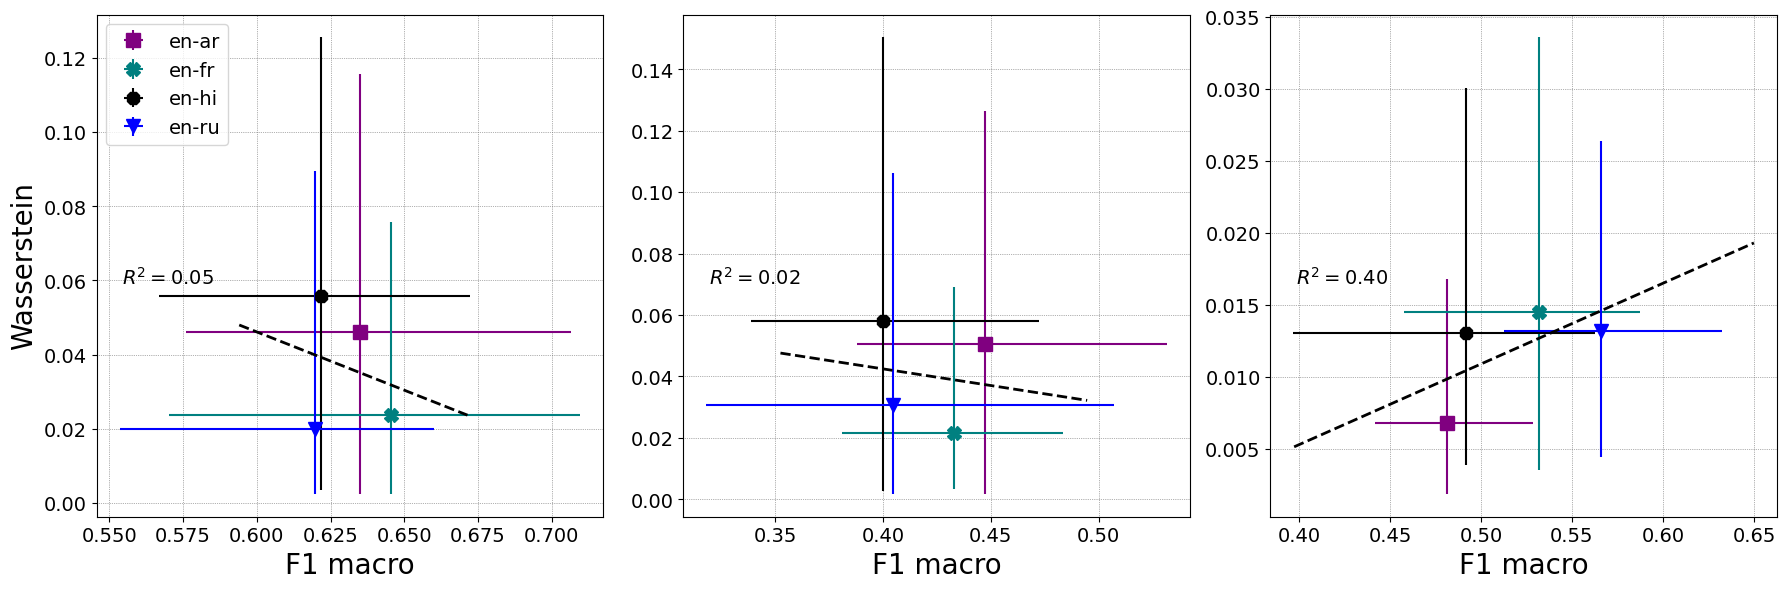

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

datasets = [("XNLI", f1_XNLI, Wasserstein_XNLI), ("Readme++", f1_Readme, Wasserstein_Readme), ("Vikidia vs Wikipedia", f1_VvsW, Wasserstein_VvsW)]

for idx, (title, f1_dict, Wasserstein_dict) in enumerate(datasets):
    ax = axs[idx]
    x_vals = []
    y_vals = []
    
    for lang in f1_dict.keys():
        if lang != 'en':
            color = colors.get(f"en-{lang}", "grey")
            marker = markers.get(f"en-{lang}", "o")
            f1_mean = np.mean(f1_dict[lang])
            f1_min = np.min(f1_dict[lang])
            f1_max = np.max(f1_dict[lang])

            Wasserstein_mean = Wasserstein_dict[f"en-{lang}"][-1]
            Wasserstein_min = np.min(Wasserstein_dict[f"en-{lang}"])
            Wasserstein_max = np.max(Wasserstein_dict[f"en-{lang}"])

            ax.errorbar(f1_mean, Wasserstein_mean, xerr=[[f1_mean - f1_min], [f1_max - f1_mean]], yerr=[[Wasserstein_mean - Wasserstein_min], [Wasserstein_max - Wasserstein_mean]], fmt=marker, color=color, markersize=10, label=f"en-{lang}")
    

            x_vals.append(f1_mean)
            y_vals.append(Wasserstein_mean)
    
    # Линейная аппроксимация
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

    delta_x = max(x_vals) - min(x_vals)
    x = np.linspace(min(x_vals) - delta_x, max(x_vals) + delta_x, 100)
    y = intercept + slope * x
    ax.plot(x, y, color='black', linestyle='--', linewidth=2)
    
    # r^2
    r_squared = r_value**2
    ax.text(0.05, 0.5, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes, fontsize=14, verticalalignment='top')
    
    #ax.set_title(title, size=30)
    ax.set_xlabel("F1 macro", size=20)
    if idx == 0:
        ax.set_ylabel("Wasserstein", size=20)
        ax.legend(fontsize=14, loc='upper left')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(which='major', color='#666666', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()